Project: DataSc_predict_explain_diabetes       -       Creator: Benjamin Gaube       -        Date: 2024-07-13

# Analyze Diabetes Data provided by Nandita Pore 
<br> 
Source: https://www.kaggle.com/datasets/nanditapore/healthcare-diabetes/
<br>
Purpose: Get an initial overview of the data, possible outliers, missing values and correlations


## Librarys and Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
path="..\..\data\Healthcare_Diabetes_Dataset\Healthcare-Diabetes.csv"

In [3]:
df = pd.read_csv(path)

## first look at the Data

In [4]:
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# checking the datatypes
df.dtypes

Id                            int64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
# checking for NA values
df.isna().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# because the outcome is int instead of boolean -> check the unique values
df.Outcome.unique()

array([1, 0], dtype=int64)

In [8]:
# view the desciptive statistic to get a feeling for the plausibility of the data
df.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


<b> Pregnancies </b><br> -> Number of times pregnant; metric; 0 to 17 (int) - 17 birth given is hard to imagin but could be a realistic number. But for the ML maybe  I should drop this individual <br>

<b> Glucose </b><br> -> Plasma glucose concentration over 2 hours in an oral glucose tolerance test; metric; 0-199 (assume in mg/dL) - expected values between 70 and 140 for healthy adults, 140-199 for individuals with prediabetes and over 200 for diabetic individuals.. values should not be zero because it's physiological impossible  <br>-> #TODO: plot it <br>

<b> BloodPressure </b><br> -> Diastolic blood pressure (mm Hg); metric; 0 to 122 mm HG - expected values for healthy individuals between 60 and 85.. values should not be 0<br>-> #TODO: plot it <br>

<b> SkinThickness </b><br> -> Triceps skinfold thickness (mm); metric; 0-110 mm - 0 is an unrealistic value <br>

<b> Insulin </b><br> -> 2-Hour serum insulin (mu U/ml); metric; 0-846 mu /ml - expected values for healthy individuals: 20-79, prediabetes (typ II): 80-150, diabetes (typ II): > 150.. but: is 846 still realistic? <br>

<b> BMI </b><br> -> Body mass index (weight in kg / height in m^2).; metric; 0-80 - <18.5 underweight, 18.5-24.9 healthy/normal, 24-29.9 overweight, >30 obese ...0 is unrealistic and 80 may be also an outlier <br>-> #TODO: plot it <br>

<b> DiabetesPedigreeFunction </b><br>  -> Diabetes pedigree function, a genetic score of diabetes; metric; 0.078-2.42<br>
"The 'DiabetesPedigreeFunction' is a function that scores the probability of diabetes based on family history, with a realistic range of 0.08 to 2.42." <br>
Reference: Akmeşe, Ö. F. (2022). Diagnosing Diabetes with Machine Learning Techiques. Hittite Journal of Science and Engineering, 9(1), 9-18. <br>

<b> Age </b><br> -> Age in years; metric; int; 21 to 81; values seem realistic </b>

<b> Outcome </b><br> -> dichotom-nominal (int) refer to boolean true/false (diabetic/not diabetic)<br>
Binary classification indicating the presence (1) or absence (0) of diabetes.<br>
<b>Note:<b> There is no information on whether it is diabetes mellitus type I, type II or both types

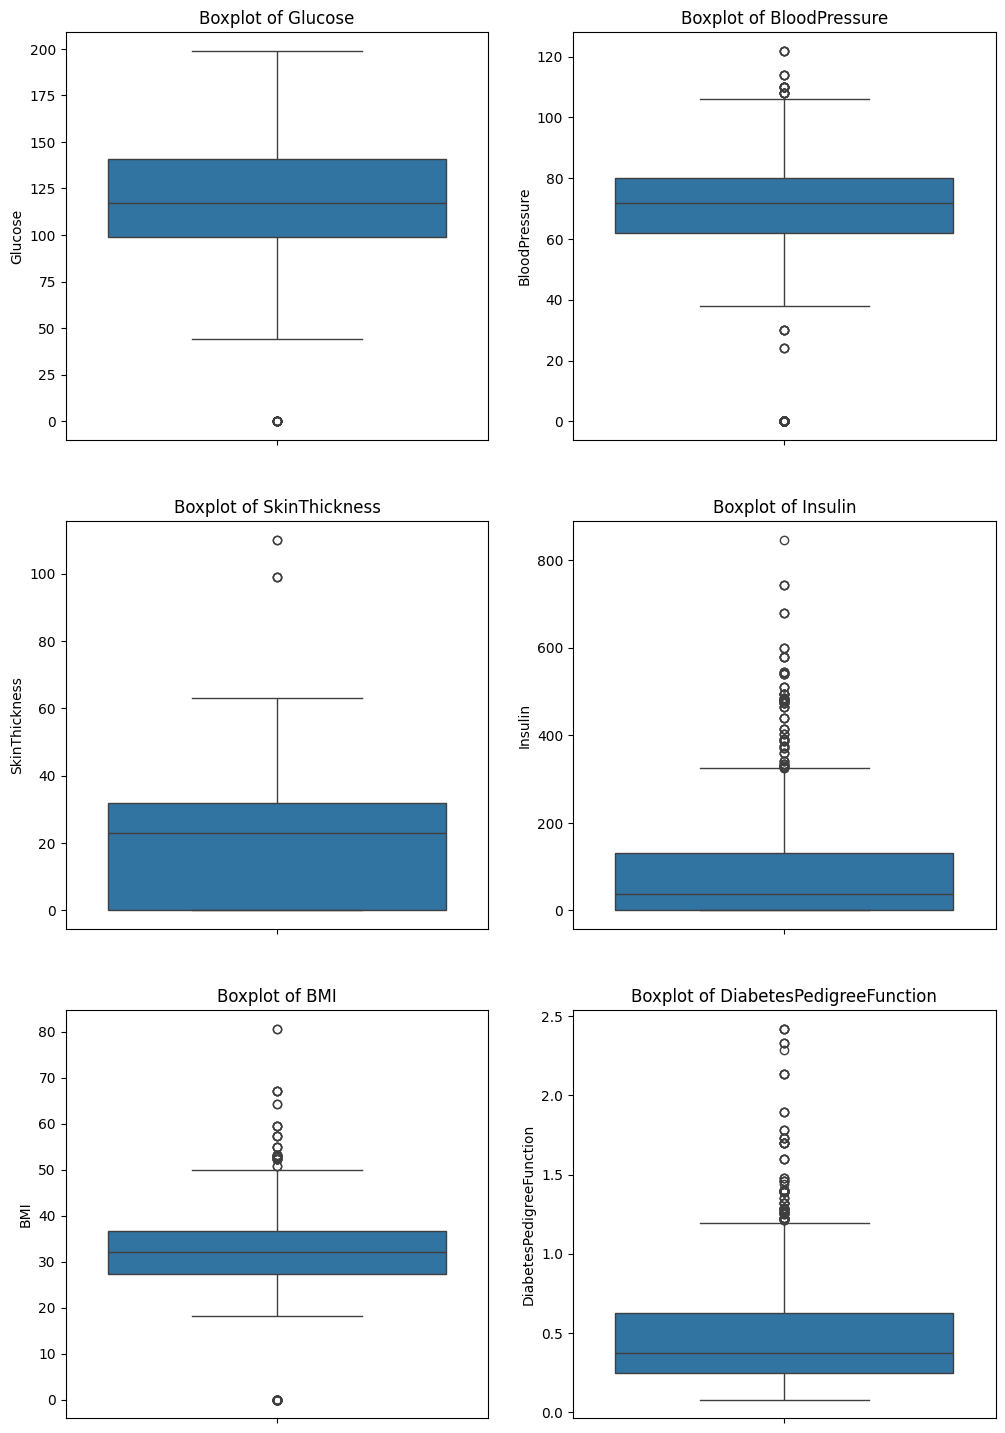

In [9]:
fig, axes = plt.subplots(3, 2, figsize=(12, 18))

for i, column in enumerate(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']):
    row, col = divmod(i, 2)
    sns.boxplot(y=df[column], ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {column}')
    axes[row, col].set_ylabel(column)

<Axes: xlabel='BMI', ylabel='Density'>

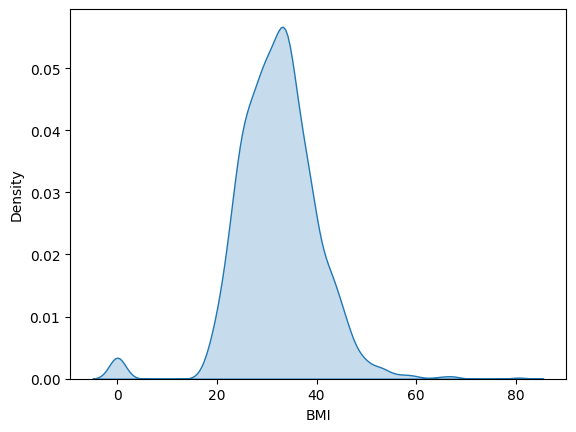

In [10]:
# graphical evaluation of the distribution using a density plot
sns.kdeplot(df.BMI, fill=True)

In [11]:
# I expect very high values for SkinThickness in people with very high BMI, so I take a look at it
df.query('BMI > 60')

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
177,178,0,129,110,46,130,67.1,0.319,26,1
945,946,0,129,110,46,130,67.1,0.319,26,1
2103,2104,0,129,110,46,130,67.1,0.319,26,1
2331,2332,4,183,66,0,215,80.6,0.654,40,0
2332,2333,1,100,62,0,0,64.4,0.152,36,0
2354,2355,4,183,66,0,215,80.6,0.654,40,0
2355,2356,1,100,62,0,0,64.4,0.152,36,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1


<b>Note:</b> It appears that the individual with a BMI of 80.6 has a SkinThickness of 0. It is possible that the skin thickness could not be measured and was therefore recorded as 0. This suggests that all records with a value of 0 for Glucose, BloodPressure, SkinThickness, Insulin, or BMI should be removed. But - there is no information whether the dataset is about diabetes mellitus typ I or typ II. This is why i will not drop theIndividuals with Insulin equal to 0 (diabetes typ I).

Upon closer inspection, it is also noticeable that IDs 2332 and 2355 seem to represent the same individual. Considering the multitude of possible combinations, it is unlikely that all parameters would be identical by chance given the relatively small number of individuals in the dataset. Similarly, IDs 2356 and 2333 appear to be the same individual. Additionally, IDs 178, 946, 2104, and 2767 also seem to represent the same individuals.

## drop "missing" values and duplicates

In [12]:
# get rid of "0" in Glucose, BloodPressure, SkinThickness, BMI but keep it for Insulin 
print(len(df))
df_valid = df.query('Glucose != 0 and BloodPressure != 0 and SkinThickness != 0 and BMI != 0')
print(len(df_valid))

2768
1932


In [13]:
df_valid.query('BMI>60')

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
177,178,0,129,110,46,130,67.1,0.319,26,1
945,946,0,129,110,46,130,67.1,0.319,26,1
2103,2104,0,129,110,46,130,67.1,0.319,26,1
2766,2767,0,129,110,46,130,67.1,0.319,26,1


In [14]:
# drop duplicates
df_valid_unique = df_valid.drop_duplicates(subset=df_valid.columns.difference(['Id']), keep='first')

In [15]:
df_valid_unique

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
6,7,3,78,50,32,88,31.0,0.248,26,1
...,...,...,...,...,...,...,...,...,...,...
2329,2330,0,116,64,39,225,40.2,0.720,50,0
2330,2331,2,142,94,59,177,38.3,0.620,63,1
2333,2334,0,163,40,23,64,40.7,0.322,33,0
2334,2335,6,139,84,37,0,50.7,0.320,50,1


<b>Note:</b> So it seems that the datasat was highly oversampled (maybe for machine learning puposes) or  highly biased (by repeated measrures of the same patient).

## closer look at the data

In [16]:
df_valid_unique.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,410.200371,3.493506,121.315399,71.434137,29.307978,115.027829,32.975696,0.502707,31.788497,0.335807
std,299.224600,3.304477,30.951346,12.423028,10.587999,122.634727,6.972614,0.343304,10.868074,0.472711
min,1.000000,0.000000,56.000000,24.000000,7.000000,0.000000,18.200000,0.085000,21.000000,0.000000
25%,205.500000,1.000000,99.000000,64.000000,22.000000,0.000000,27.950000,0.259000,23.000000,0.000000
50%,393.000000,2.000000,116.000000,72.000000,29.000000,92.000000,32.900000,0.417000,28.000000,0.000000
75%,581.500000,5.000000,142.000000,80.000000,36.000000,166.500000,37.050000,0.659000,38.000000,1.000000
max,2336.000000,17.000000,199.000000,110.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


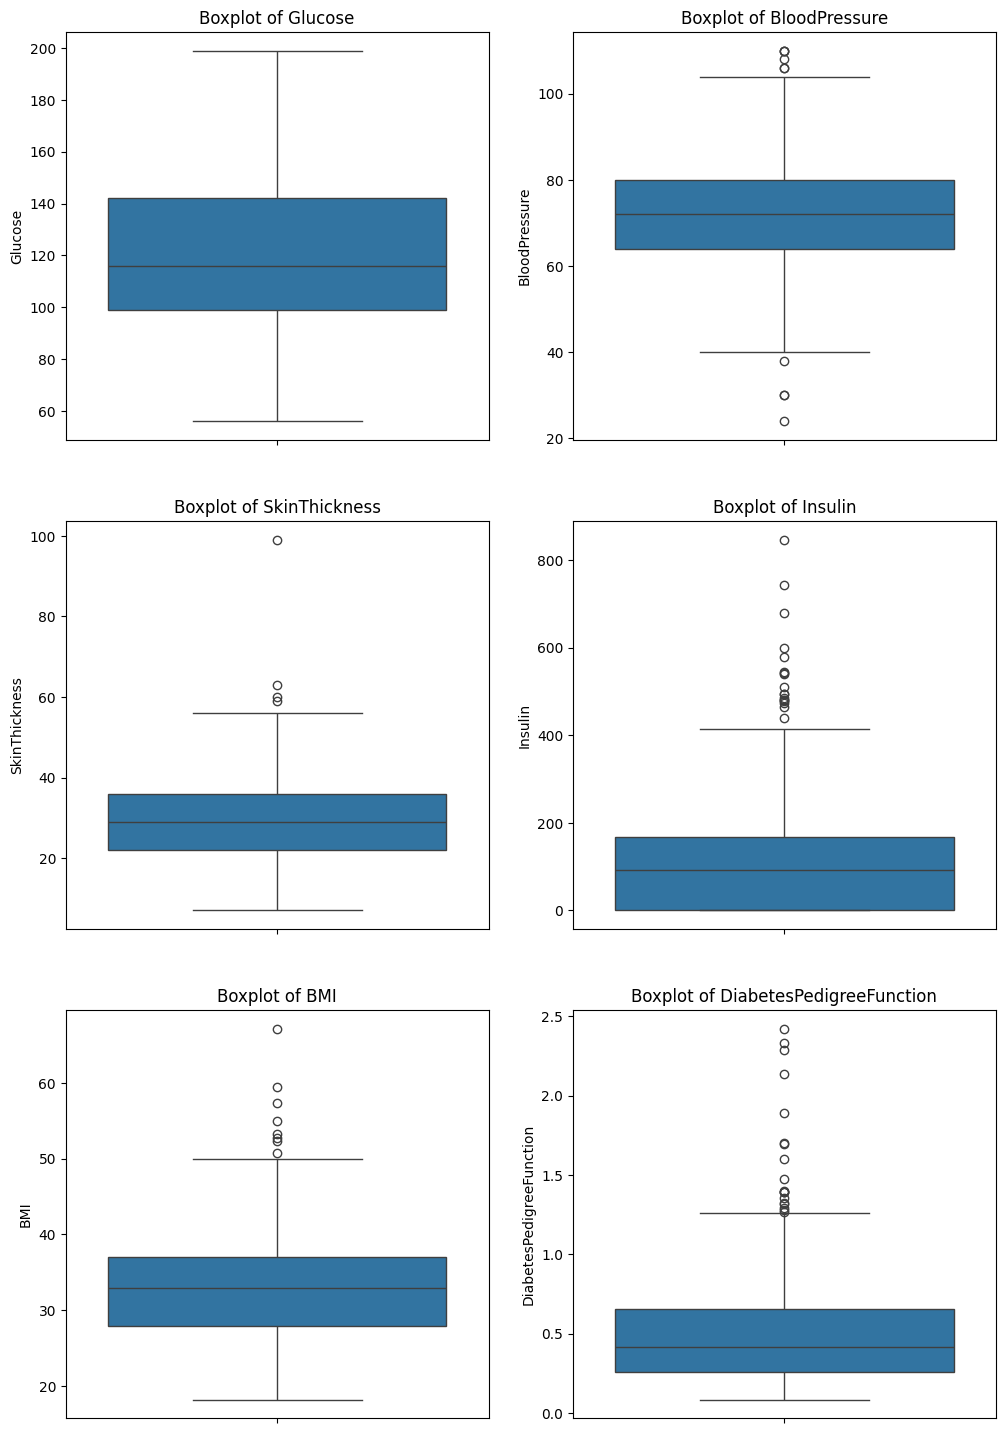

In [17]:
fig, axes = plt.subplots(3, 2, figsize=(12, 18))

for i, column in enumerate(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']):
    row, col = divmod(i, 2)
    sns.boxplot(y=df_valid_unique[column], ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {column}')
    axes[row, col].set_ylabel(column)

<Axes: ylabel='Pregnancies'>

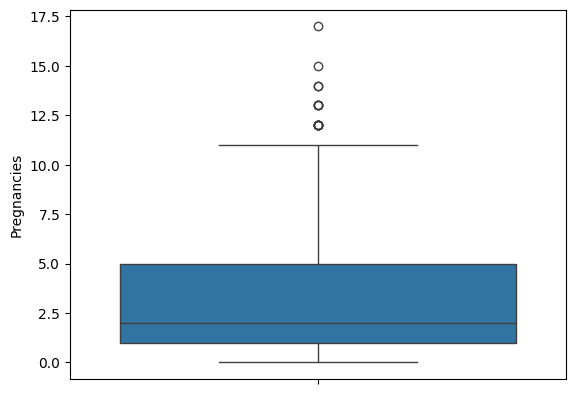

In [18]:
sns.boxplot(df_valid_unique.Pregnancies)

<b>Note:</b> Based on the distribution of pregnancies, I would assume that the sample is only female. However, this information is missing in the description of the data and there is no variable for gender. To rule out gender bias, I tend to omit previous pregnancies as a predictor, even though Joshi & Dhakal (2021), for example, use this in a similar data set to predict diabetes. Before that, however, I will take a look at the correlations of all predictors with the outcome variable.

Joshi, R. D., & Dhakal, C. K. (2021). Predicting Type 2 Diabetes Using Logistic Regression and Machine Learning Approaches. International journal of environmental research and public health, 18(14), 7346. https://doi.org/10.3390/ijerph18147346  

In [36]:
# Significant correlations with the outcome variable
correlations, p_values = [], []

for column in df.columns.difference(['Outcome', 'Id']):
    corr, p_value = pearsonr(df[column], df['Outcome'])
    correlations.append(corr)
    p_values.append(p_value)

corr_outcome = pd.DataFrame({
    'r': correlations,
    'p': p_values
}, index=df.columns.difference(['Outcome', 'Id']))

corr_outcome = corr_outcome.sort_values(by='r', ascending=False)
print(corr_outcome)

                                 r              p
Glucose                   0.460644  1.842493e-145
BMI                       0.280928   2.257376e-51
Age                       0.237050   1.167583e-36
Pregnancies               0.223796   9.256929e-33
DiabetesPedigreeFunction  0.160664   1.827199e-17
Insulin                   0.123646   6.694785e-11
SkinThickness             0.075603   6.847261e-05
BloodPressure             0.072900   1.236419e-04


<Axes: >

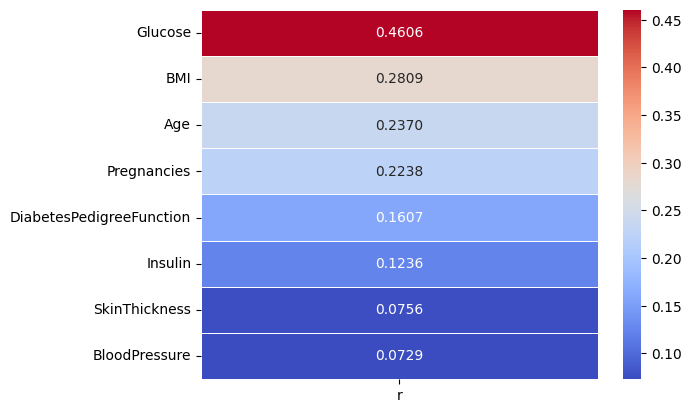

In [37]:
sns.heatmap(pd.DataFrame(corr_outcome, columns=['r']), annot=True, cmap='coolwarm', fmt=".4f", linewidths=.5)

<b>Note:</b> Pregnancies are still the fourth most strongly correlated with diabetes, but according to Cohen only "small". Due to the uncertainty expressed above and in the presence of multicolinearity, I would not use this predictor.

As expected, glucose is very highly correlated. The low correlation of insulin could indicate that both diabetes type I and type II individuals are present in the data set, but that diabetes type II is overrepresented.

<Axes: >

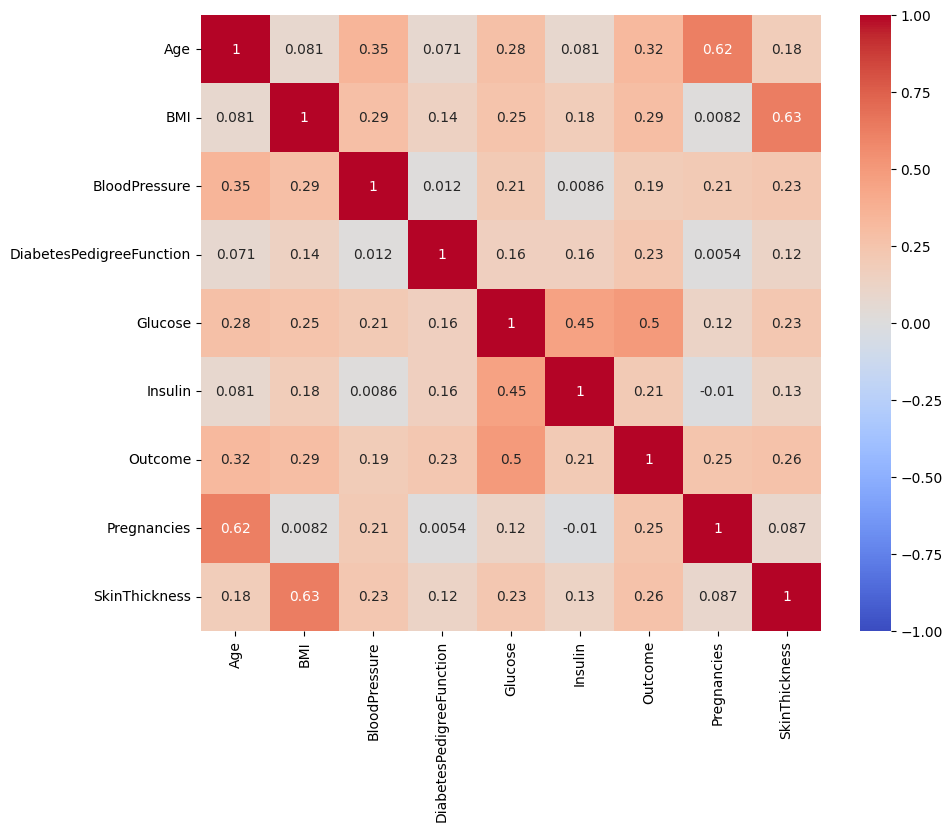

In [22]:
# Multicollinearity
plt.figure(figsize=(10, 8))
sns.heatmap(df_valid_unique[df_valid_unique.columns.difference(['Id'])].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

## Diabetes mellitus type I and type II

In the Sample are 358 individuals without diabetes and 181 individuals with diabetes


<Axes: xlabel='Outcome', ylabel='count'>

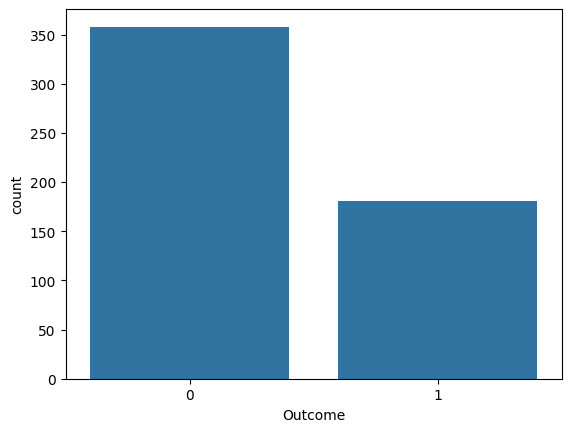

In [44]:
# visualize number of individuals without diabetes (0) and with diabetes (1)
print(f"In the Sample are {len(df_valid_unique) - df_valid_unique['Outcome'].sum()} individuals without diabetes and {df_valid_unique['Outcome'].sum()} individuals with diabetes")
sns.countplot(x=df_valid_unique['Outcome'])

I would expect people with diabetes to have a high plasma glucose concentration because they are insensitive to insulin (type II) or unable to produce insulin (type I). So if Type I and Type II diabetics are included in the outcome variable, they should have both high glucose and low insulin as well as high glucose and high insulin.

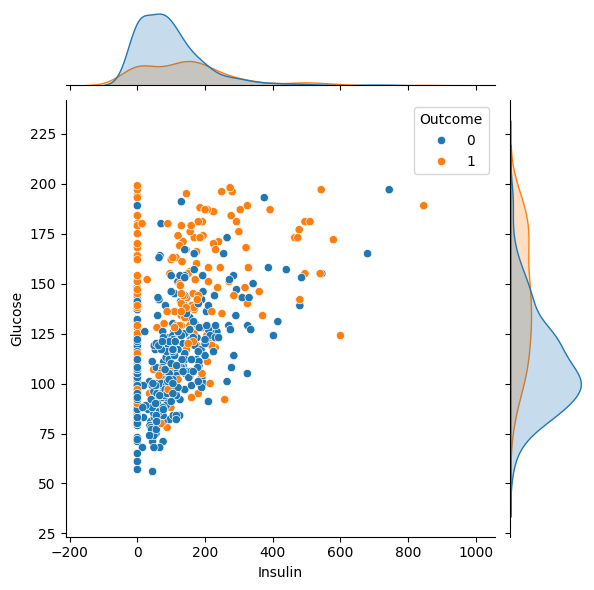

In [48]:
sns.jointplot(data=df_valid_unique, x="Insulin", y="Glucose", hue="Outcome")

<Axes: xlabel='Insulin'>

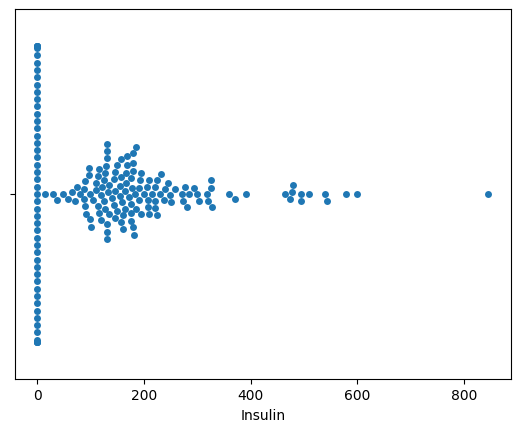

In [61]:
sns.swarmplot(data=df_valid_unique.query('Outcome == 1'), x='Insulin')

<Axes: xlabel='Insulin'>

C:\Dateien Benjamin\playground\Python\repo\DataSc_predict_explain_diabetes\venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 18.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


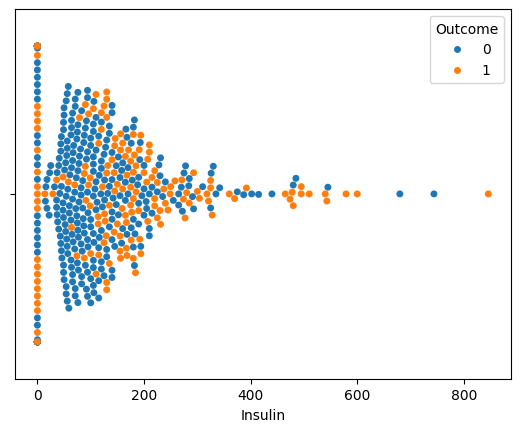

In [65]:
sns.swarmplot(data=df_valid_unique, x='Insulin', hue='Outcome')

<Axes: xlabel='Insulin'>

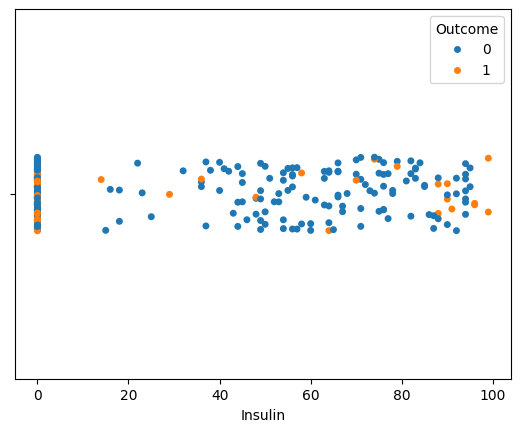

In [59]:
sns.stripplot(data=df_valid_unique.query('Insulin < 100'), x='Insulin', hue='Outcome')

<b>Conclusion: </b> The sample includes type I and type II diabetics. It is also possible that some people with diabetes are not classified as diabetics (people with high insulin levels). In addition, there appear to be some people diagnosed with diabetes who have normal insulin levels. It is conceivable that these people are already cured. 

Although I cannot correct the diagnosis, but I may differentiate between type I and type II with unsupervised learning.

## Codesnipped for data cleaning

will be used in downstream jupiter notebooks

In [68]:
df = pd.read_csv(r'..\..\data\Healthcare_Diabetes_Dataset\Healthcare-Diabetes.csv')
df = df.query('Glucose != 0 and BloodPressure != 0 and SkinThickness != 0 and BMI != 0')
df = df.drop_duplicates(subset=df.columns.difference(['Id']), keep='first')
df = df.drop(columns=['Pregnancies'])

In [69]:
df.describe()

,Id,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,410.200371,121.315399,71.434137,29.307978,115.027829,32.975696,0.502707,31.788497,0.335807
std,299.224600,30.951346,12.423028,10.587999,122.634727,6.972614,0.343304,10.868074,0.472711
min,1.000000,56.000000,24.000000,7.000000,0.000000,18.200000,0.085000,21.000000,0.000000
25%,205.500000,99.000000,64.000000,22.000000,0.000000,27.950000,0.259000,23.000000,0.000000
50%,393.000000,116.000000,72.000000,29.000000,92.000000,32.900000,0.417000,28.000000,0.000000
75%,581.500000,142.000000,80.000000,36.000000,166.500000,37.050000,0.659000,38.000000,1.000000
max,2336.000000,199.000000,110.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [70]:
df_valid_unique.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,410.200371,3.493506,121.315399,71.434137,29.307978,115.027829,32.975696,0.502707,31.788497,0.335807
std,299.224600,3.304477,30.951346,12.423028,10.587999,122.634727,6.972614,0.343304,10.868074,0.472711
min,1.000000,0.000000,56.000000,24.000000,7.000000,0.000000,18.200000,0.085000,21.000000,0.000000
25%,205.500000,1.000000,99.000000,64.000000,22.000000,0.000000,27.950000,0.259000,23.000000,0.000000
50%,393.000000,2.000000,116.000000,72.000000,29.000000,92.000000,32.900000,0.417000,28.000000,0.000000
75%,581.500000,5.000000,142.000000,80.000000,36.000000,166.500000,37.050000,0.659000,38.000000,1.000000
max,2336.000000,17.000000,199.000000,110.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000
